# 게임 A - 유저 군집 분석 및 사업 개선 방안

## 1. 유저 군집분석
- **구매 유저 비율**을 기준으로 데이터를 탐색


- **K Prototype Clustering**을 사용하여 군집화를 진행 했고 **elbow curve**를 활용하여 최적의 군집 개수 도출

### 1-1. 군집 특징
- 군집을 나누는 특징은 고려한 **모든 변수에 차이**가 있다고 판단됨

> 고려한 변수는 크게 **활동 관련 변수**, **구매 관련 변수**  
>
> 각 군집의 유저들은 **플레이 타임, 플레이하는 컨텐츠 개수, 과금량, 구매 유저 비율 등**에서 큰 차이를 갖음

#### 군집 이름 및 특징
> **Level0 : 활동성과 과금력이 매우 저조한 유저 or 이탈 유저 그룹**  
> - 접속률 : 일 평균 5 ~ 9%
> - 구매율 : 1%
> - 과금력 : 주요 구매 패키지 평균 가격 1,480원

> **Level1 : 활동성이 높고 과금력이 준수한 유저 그룹**
> - 접속률 : 일 평균 54 ~ 71%
> - 구매율 : 32%
> - 과금력 : 주요 구매 패키지 평균 가격 5,140원

> **Level2 : 활동성과 과금력이 매우 높은 유저 그룹**
> - 접속률 : 일 평균 70 ~ 93%
> - 구매율 : 99%
> - 과금력 : 주요 구매 패키지 평균 가격 53,620원


#### 4월 군집별 주요 지표
> **level_2**의 유저는 매우 적지만 **매출의 약 73%** 를 차지

> **level_0**의 유저는 4월 27일 기준 접속을 안 한지 평균적으로 **12.7일**

In [80]:
cluster_df

,count,purchase_prob.,mean_max_lv,mean_playtime,mean_sales,total_sales,mean_Recent,mean_num_purchase
cluster,,,,,,,,
level_0,115221,0.01,4.61,74.41,89.48,10310400,12.70,0.02
level_1,10120,0.32,21.22,"2,538.44","17,375.87",175843800,2.14,1.57
level_2,383,0.99,27.14,"9,565.84","1,297,191.38",496824300,0.52,30.48


----

### 1-2. 군집 비교 시각화

    

#### Min-Max Scale Numeric Type Feature 비교


- 대부분 **level2**가 **크다**는 것을 확인 할 수 있음


- **level2**에서 값을 매우 크게 갖는 유저들이 있어 Feature 상태공간이 큰 Feature의 값이 0에 가깝게 나옴
> **level2** 중에서도 또 **헤비 유저**들이 존재함을 의미

- Categorical, Binary Type Feature 또한 Numeric Type Feature을 파생시킨 또는 파생된 변수이기 크게 다르지 않음

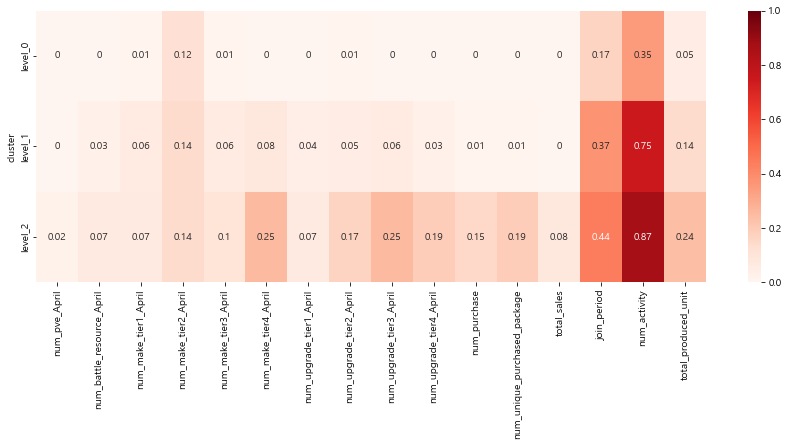

In [78]:
plt.figure(figsize = (15,5))
sns.heatmap(pre_df, cmap = 'Reds', vmin=0, vmax=1, annot = True)
plt.show()

----

#### 4월 접속률 비교

**Level0**
> - **기존 유저**와 4월에 유입되었다 **빠르게 이탈한 고객**으로 이뤄진 것으로 추측됨
>
> - 평균 접속일이 1.78일로 이탈할 유저는 1~2일 정도 플레이하고 이탈하는 것으로 보여짐


**Level1**
> - 4월 평균 접속일이 17.72일로 27일중 2/3 가량 접속하였고 그정도 수준의 접속률을 보임


**Level2**
> - 접속률이 70% 정도 수준에서 90% 까지 육박하며 군집에 속한 대부분 유저가 접속하는 특징
> - Level2 유저 30% 만이 4월에 유입이 되었던것을 감안하면 **유입 후 거의 빠짐없이 게임에 접속**한 것으로 보임
> > 4월 첫 접속을하고 4월 27일 까지의 접속률이 95%가 넘는 유저가 85%로 위 추측이 맞는것으로 판단됨


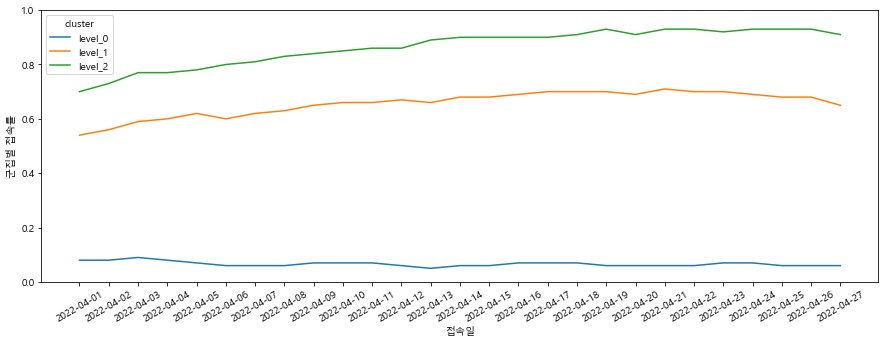

In [121]:
plt.figure('figsize', (15,5))
sns.lineplot(x = df_join_rate['logdate_kst'],
                y = df_join_rate[0],
                hue = df_join_rate['cluster'].astype(str))
plt.xticks(rotation = 30)
plt.ylabel(ylabel = '군집별 접속률')
plt.xlabel(xlabel = '접속일')
plt.ylim([0,1.0])  
plt.show()

----

#### 최근성, 과금량, 구매빈도 비교
- **Level0**은 Recent가 고르게 퍼저있으며 **상품구매 횟수와 결제금액이 매우 적은 것**을 알 수 있음


- **Level1**은 Recent가 많이 퍼졌지만 **Recent가 커질 수록 수가 상대적으로 적게 분포**하며, 과금도 적절하게 하는 것을 볼 수 있음


- **Level2**는 거의 대부분이 Recent가 0인 지점에 몰려있고 **과금을 상대적으로 많이 하는 것**을 볼 수 있음

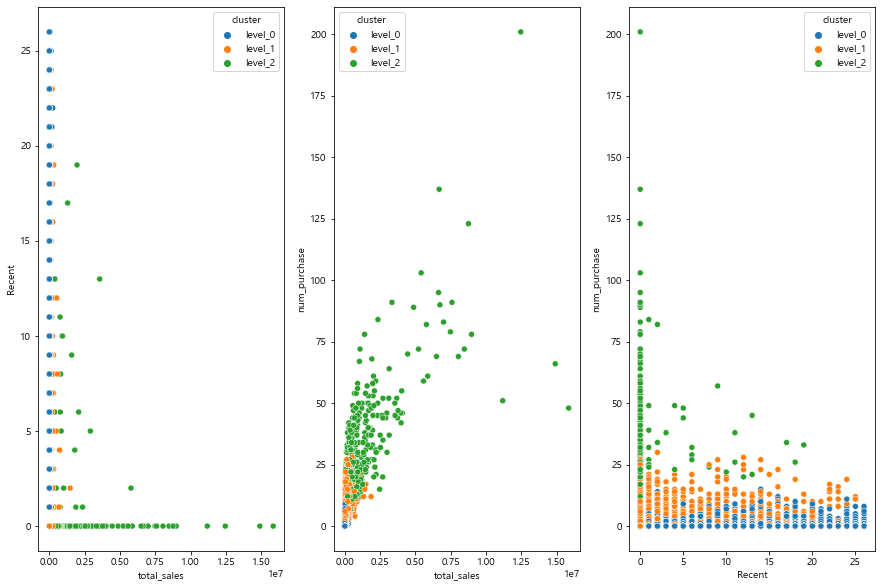

In [19]:
# 최근성, 구매빈도, 구매규모 plot
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,10))
sns.scatterplot(x = df['total_sales'], y = df['Recent'],
                hue = df['cluster'].astype('str'), ax = axes[0])
sns.scatterplot(x = df['total_sales'], y = df['num_purchase'],
                hue = df['cluster'].astype('str'), ax = axes[1])
sns.scatterplot(x = df['Recent'], y = df['num_purchase'],
                hue = df['cluster'].astype('str'), ax = axes[2])
plt.show()

-----

#### PCA 분석 비교

#### PCA Plot
- Standard Scale을 적용 후 PCA 진행
- 괄호 안 숫자는 각 PC가 설명하는 분산의 ratio


- **Level2**는 PC1, PC2 기준으로 다른 군집보다 높은 값에 분포하며 **매우 큰 산포**를 가짐
> 이는 Level2 내에서도 **극단적인** 값을 갖는 유저가 존재한다는 것이며 이 결과는   
num_purchase vs total_sales plot과 비슷함

- PC1, PC2 기준으로 각 군집의 경계에 존재하는 유저는 다른 군집으로 변화할 수 있는 확률이 높다고 판단

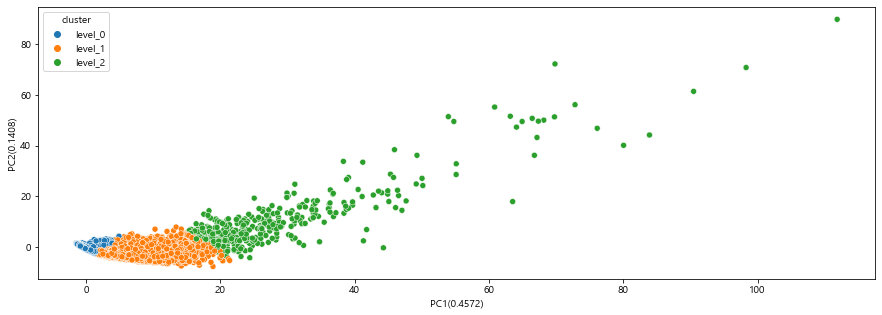

In [31]:
plt.figure(figsize = (15,5))
sns.scatterplot(x = pca_df['PC1'], y = pca_df['PC2'], hue = pca_df['cluster'].astype(str))
plt.xlabel("PC1" + f"({str(0.4572)})")
plt.ylabel("PC2" + f"({str(0.1408)})")
plt.show()

#### 군집별 가까운 상위 1% 유저 분석
- 각 군집의 중심과 유저의 거리를 사용하여 가까움을 정의 
> - 군집의 중심 : (PC1_mean, PC2_mean)
> - 거리 : Euclidean Distance

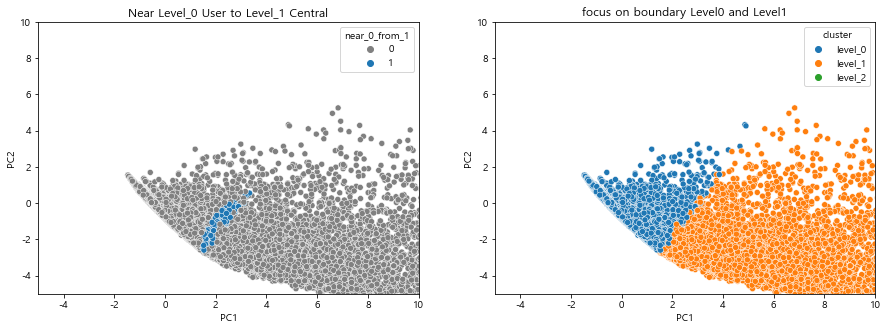

In [44]:
fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.scatterplot(x = pca_df['PC1'], y = pca_df['PC2'], hue = pca_df['near_0_from_1'], 
                palette=['grey','C0'], ax = ax)
ax.set_xlim([-5,10])
ax.set_ylim([-5,10])
ax.set_title('Near Level_0 User to Level_1 Central')
sns.scatterplot(x = pca_df['PC1'], y = pca_df['PC2'], hue = pca_df['cluster'].astype(str),
                ax = ax2)
ax2.set_xlim([-5,10])
ax2.set_ylim([-5,10])
ax2.set_title("focus on boundary Level0 and Level1")
plt.show()

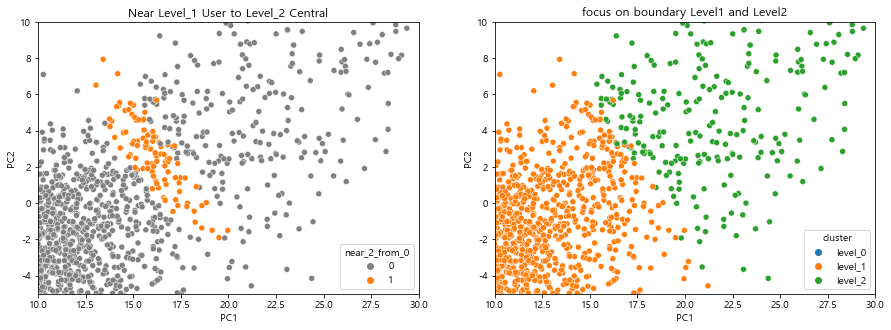

In [45]:
fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sns.scatterplot(x = pca_df['PC1'], y = pca_df['PC2'], hue = pca_df['near_2_from_0'],
                palette=['grey','C1'],ax = ax)
ax.set_xlim([10,30])
ax.set_ylim([-5,10])
ax.set_title('Near Level_1 User to Level_2 Central')
sns.scatterplot(x = pca_df['PC1'], y = pca_df['PC2'], hue = pca_df['cluster'].astype(str),
                ax = ax2)
ax2.set_xlim([10,30])
ax2.set_ylim([-5,10])
ax2.set_title("focus on boundary Level1 and Level2")
plt.show()

- **Level 0 상위 1% 유저의 Level1 과 Level0 Feature 별 가까움 비교**

>  **Level1에 더 가까운 Feature : 활동성, 참여 컨텐츠 수, 유닛 생산량 관련 Feature**


>  **Level0에 더 가까운 Feature : 구매력과 컨텐츠 진행량, 유닛 업그레이드량 관련 Feature**

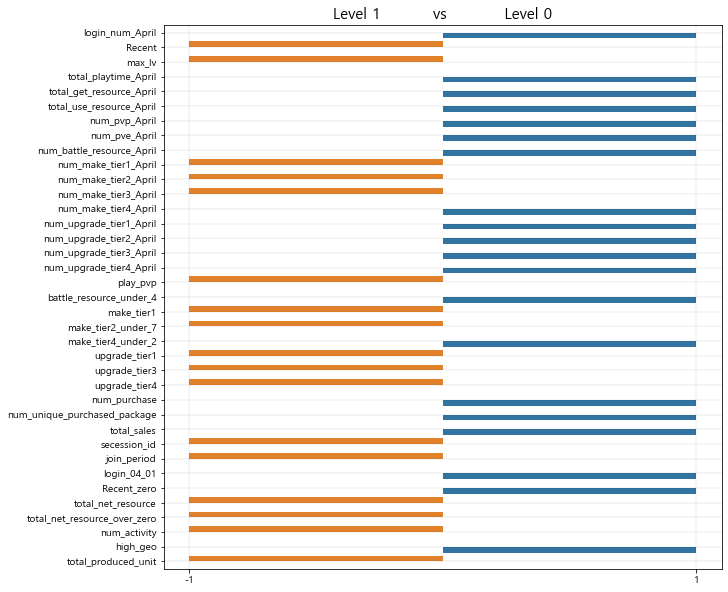

In [275]:
plt.figure(figsize = (10,10))
ax = sns.barplot(y = comp_df.index,
            x = comp_df[0],
            hue = comp_df[0],
            palette = ['C1','C0'])
plt.title("Level 1          vs           Level 0", fontsize = 15)
plt.xticks([-1, 1])
plt.legend([],[], frameon=False)
plt.xlabel("")
ax.grid(b=True, which='major', color='black', linewidth=0.075)
plt.show()

- **Level 1 상위 1% 유저의 Level2 와 Level1 Feature 별 가까움 비교**

>  **Level2에 더 가까운 Feature : 활동성, 구매력, 참여 컨텐츠 수, 유닛 생산량 관련 Feature**


>  **Level1에 더 가까운 Feature : 컨텐츠 진행량, 유닛 업그레이드량 관련 Feature**

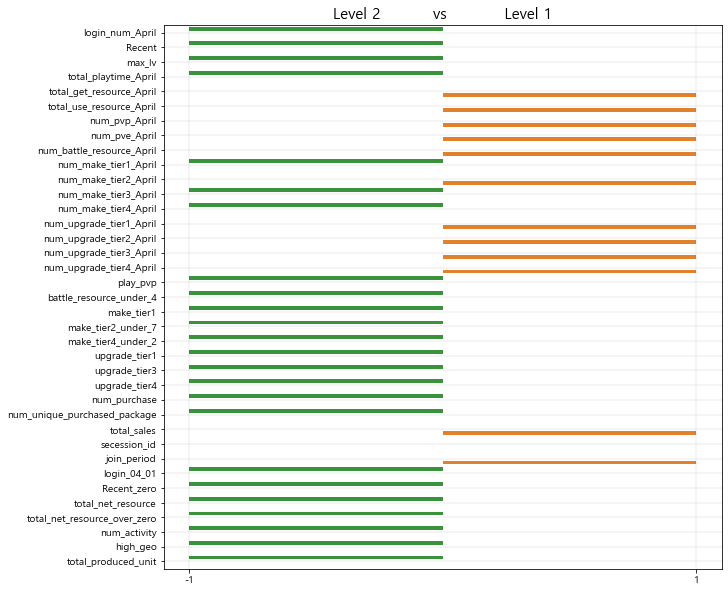

In [120]:
plt.figure(figsize = (10,10))
ax = sns.barplot(y = comp_df2.index,
            x = comp_df2[0],
            hue = comp_df2[0],
            palette = ['C2','C0','C1'])
plt.title("Level 2          vs           Level 1", fontsize = 15)
plt.xticks([-1, 1])
plt.legend([],[], frameon=False)
plt.xlabel("")
ax.grid(b=True, which='major', color='black', linewidth=0.075)
plt.show()

----

#### 구매 패키지 비교

#### 구매 패키지 종류 비교(전체 패키지 종류 - 170 종) 
- Level0 : 93 종류(54.71%)
- Level1 : 156종류(91.76%)
- Level2 : 169종류(99.41%)

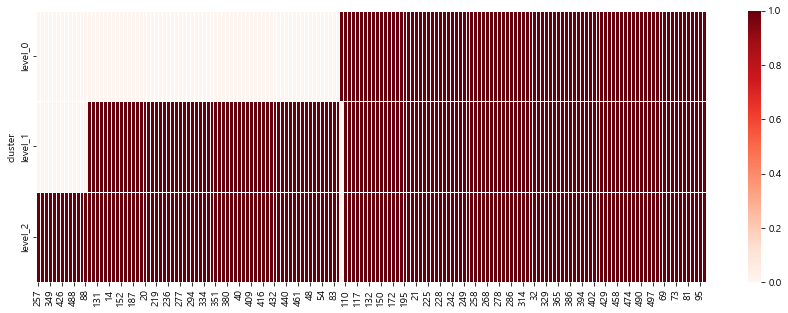

In [241]:
plt.figure(figsize = (15,5))
sns.heatmap(package_drop_du_df, cmap = 'Reds', linewidths=.5)
plt.show()

#### 구매 패키지 분포 비교
- Level0 구매 Top 10 패키지 판매 비중 : 71.20%
- Level1 구매 Top 10 패키지 판매 비중 : 39.57%
- Level2 구매 Top 10 패키지 판매 비중 : 26.65%

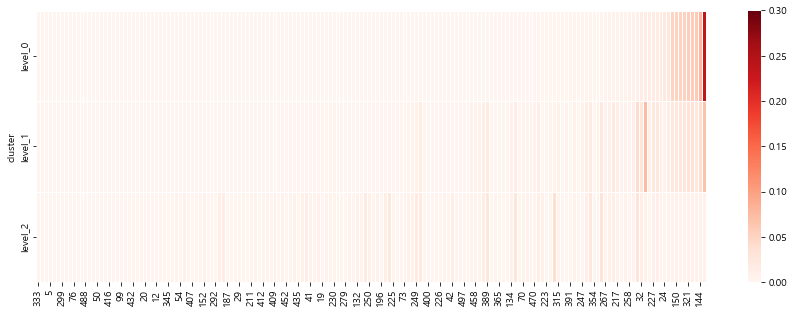

In [243]:
plt.figure(figsize = (15,5))
sns.heatmap(package_df, cmap = 'Reds', linewidths=.5, vmax = .3)
plt.show()

#### 구매 Top 10 패키지 비교
- 군집별 Top 10 패키지
> - Level 0 : 28, 44, 95, 144, 150, 161, 246, 321, 419, 429
> - Level 1 : 32, 44, 86, 95, 144, 150, 161, 321, 429, 494
> - Level 2 : 2, 98, 193, 249, 287, 350, 389, 395, 494, 495

- 군집별 Top 10 패키지 평균 가격
> - Level 0 : 1,480원
> - Level 1 : 5,140원
> - Level 2 : 53,620원

- 전체 Top 10 에 각 군집 Top 10 분포
> - Level 0 : 0 개
> - Level 1 : 1 개
> - Level 2 : 7 개
> - etc     : 3 개

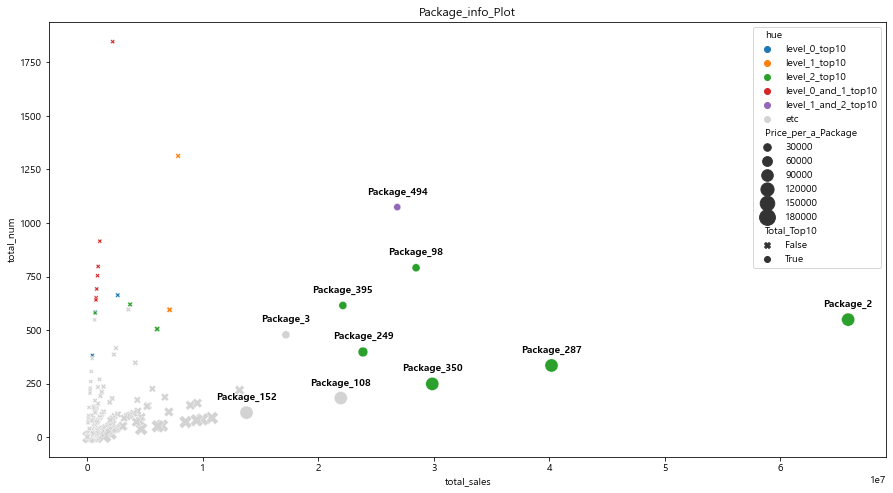

In [254]:
plt.figure(figsize = (15,8))
plt.title("Package_info_Plot")
sns.scatterplot(x = package_price['total_sales'],
                y = package_price['total_num'],
                hue = package_price['hue'],
                hue_order= ['level_0_top10', 'level_1_top10', 'level_2_top10',
                            'level_0_and_1_top10', 'level_1_and_2_top10', 'etc'],
                palette= ['C0', 'C1', 'C2', 'C3', 'C4', 'lightgrey'],
                size = package_price['Price_per_a_Package'], sizes = (20,250),
                style = package_price['Total_Top10'],
                markers = ['X', 'o'] # ov^<>8sp*hHDdPX
                )

Top_10_packages = package_price.iloc[:10,0]
Top_10_packages =  pd.Series(['Package_' + str(i) for i in package_price.iloc[:10,0]],
                             index= Top_10_packages.index)

for idx,package in zip(Top_10_packages.index,Top_10_packages.values):
     plt.text(package_price['total_sales'][idx], package_price['total_num'][idx] + 60,
              package, 
              horizontalalignment='center', 
              size='medium', 
              color='black', 
              weight='semibold')
plt.show()

-----

## 2. 사업 개선 방안 제안
- 군집별 특징을 중심으로 매출과 부족한 지표를 더 높이기 위한 방안 제안

### 2-1. 군집별 패키지 추천 판매
- 군집별 유저들의 패키지 구매 정보를 바탕으로 같은 군집의 유저에게 추천 판매


- 고려 요소 : 군집별 특징, 유저 패키지 장바구니, 패키지 구매 순서



- 군집별로 아래의 순서대로 패키지 추천 

> - Level0 : 
>> 1. 구매 시퀀스 분석을 통해 유저들이 주로 처음으로 구매하는 패키지 추천
>> 2. 같은 군집에서 가장 많이 구매한 패키지 추천
>> 3. 같은 군집의 유저가 구매하고 아직 안 산 패키지를 추천

> - Level1 : 
>> 1. 같은 군집에서 가장 많이 구매한 패키지 추천
>> 2. 같은 군집의 유저가 구매하고 아직 안 산 패키지를 추천
>> 3. 구매한 패키지와 효율과 가격이 비슷한 패키지 추천 

> - Level2 : 
>> 1. 같은 군집의 유저가 구매하고 아직 안 산 패키지를 추천
>> 2. 최상위 1% 랭커들이 많이 구매하는 패키지 추천
>> 3. 구매한 패키지 보다 효과가 더 좋고 비싼 패키지 추천

### 2-2. 신규 패키지 개발
- 해당 군집의 특징을 바탕으로 유저가 게임을 하는데 필요한 요소를 제공하고 해당 군집 유저의 과금력을 고려한 적절한 가격의 패키지 개발



- 고려 요소 : 군집별 특징, 패키지 가격, 패키지 유형


- Level0 : 
> - 낮은 접속률과 구매율을 높이기 위한 유인 패키지 개발
> - 낮은 과금력을 고려한 효율이 높고 현재의 패키지의 효과와 가격이 비슷한 패키지 개발

- Level1 : 
> - 접속률을 더 높이게 하기 위한 유인 패키지 개발
> - 어느 정도 과금 성향이 있기 때문에 Level2만 사는 패키지 중 비싼 패키지의 값싼 버전의 패키지 개발

### 2-3. Level 0, 1 상위 1% 유저 타겟 마케팅  
- Level0,1 상위 1% 유저들을 상위 군집으로 변화시키기 위해 필요한 요소를 제공하는 패키지 개발
- 해당 유저들이 상위 군집으로 모두 변하면 기대되는 월간 수익 증가량은 149,434,876원(+22% MoM)


- Level0 상위 1% 유저 : 
> - 활동성은 Level1 유저와 비슷하지만 과금력이 부족한 Case이기 때문에 현재 판매 Package를 더 많이 구매할 수 있는 기회 제공      
> - 업그레이드량, 컨텐츠 진행량이 Level1 유저에 비해 떨어지기 때문에 이 두가지를 향상시킬 수 있는 Package 추천 판매

- Level1 상위 1% 유저 :
> - 업그레이드량이 Level2 유저에 비해 떨어지기 때문에 이를 향상시킬 수 있는 Pacakage 추천 판매

### 2-4. 길드 시스템 개발
- 소수의 레벨 2 유저들을 중심으로 유저들을 활동성과 필요한 요소를 증가시키기 위한 사업 방안


- Level0 : 길드를 통해 소속감을 느끼고 필요한 정보와 편의를 제공받아 접속률을 높일 수 있을 것으로 기대


- Level1 : 추가 컨텐츠로 새로운 재미를 추가하고 소속감을 제공하여 접속률을 높일 수 있을 것으로 기대


- Level2 : 상위 랭커로서의 우월감을 고양시키고 추가 컨텐츠 제공으로 필요 자원량 늘어 관련 패키지 구입 증가 기대

## 3. 향후 분석 방향
1) 패키지 연관 분석  


2) 유저 행동 시퀀스 분석  


3) 구매 시퀀스 분석  


4) 유저 군집 변화 분석  


5) 군집별 세부 분류  


6) 사업 개선 방안 평가 및 고도화  

## 코드

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from scipy.stats import *

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [53]:
pd.set_option('display.float_format','{:,.2f}'.format)

In [6]:
df = pd.read_csv('20220508_df.csv')

In [7]:
final_df = pd.read_csv('20220508_final_df.csv')

In [8]:
pca_df = pd.read_csv('20220508_pca_df.csv')

In [20]:
action = pd.read_csv('Action_data.csv')
action = action.iloc[:,1:]

In [122]:
purchase = pd.read_csv("Purchase_data.csv")
purchase = purchase.iloc[:,1:]

In [22]:
action['cluster'] = action['charid'].replace(df[['charid','cluster']].set_index('charid').to_dict()['cluster'])

In [31]:
cluster_df = pd.DataFrame(df.groupby('cluster')['charid'].count())
cluster_df.rename({'charid' : 'count'}, axis = 1, inplace = True)

cluster_df['purchase_prob.'] = pd.crosstab(index = df['cluster'], columns = df['num_purchase'] > 0, normalize= 'index').iloc[:,1]
cluster_df['mean_max_lv'] = df.groupby('cluster')['max_lv'].mean()
cluster_df['mean_playtime'] = df.groupby('cluster')['total_playtime_April'].mean()
cluster_df['mean_sales'] = df.groupby('cluster')['total_sales'].mean()
cluster_df['total_sales'] = df.groupby('cluster')['total_sales'].sum()
cluster_df['mean_Recent'] = df.groupby('cluster')['Recent'].mean()
cluster_df['mean_num_purchase'] = df.groupby('cluster')['num_purchase'].mean()

In [47]:
level0 = df[df['cluster'] == 'level_0']
level1 = df[df['cluster'] == 'level_1']
level2 = df[df['cluster'] == 'level_2']

In [43]:
n_col = [i for i in df.columns if len(df[i].unique()) >= 15]
n_col.remove('charid')
n_col.remove('first_login_April')
n_col.remove('last_login_April')
n_col.remove('first_accessdate_charid')
n_col.remove('geo')
n_col.remove('total_net_resource')

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_MinMax_df = scaler.fit_transform(df[n_col])
numeric_MinMax_df = pd.DataFrame(numeric_MinMax_df, columns=n_col)

In [56]:
numeric_MinMax_df['cluster'] = df['cluster']

In [58]:
numeric_MinMax_df['Recent'] = 1- numeric_MinMax_df['Recent'] 

In [75]:
pre_df = round(numeric_MinMax_df.groupby('cluster').mean(),2).iloc[:,7:]

In [10]:
first_login_april = pd.crosstab(index = df['first_login_April'], columns= df['cluster'], normalize= 'columns').stack().reset_index()
first_login_april.rename({0:'prob'}, axis = 1, inplace = True)

In [14]:
first_login_april2 = pd.crosstab(index = df['first_login_April'], columns= (df['num_purchase'] > 0))
first_login_april2['prob'] = first_login_april2[True] / (first_login_april2[True] + first_login_april2[False]) * 100

In [24]:
df_join_rate = pd.crosstab(index = action['logdate_kst'], columns = action['cluster'])
df_join_rate['level_0'] = round(df_join_rate['level_0'] / 115221,2)
df_join_rate['level_1'] = round(df_join_rate['level_1'] / 10120,2)
df_join_rate['level_2'] = round(df_join_rate['level_2'] / 383,2)

In [25]:
df_join_rate = df_join_rate.stack().reset_index()

In [50]:
near_0_from_1_df = df[pca_df['near_0_from_1'] == 1]

In [51]:
level_1_plust_near_df = pd.concat([near_0_from_1_df,level1], axis = 0)

In [ ]:
comp_df = abs(pd.concat([level0.groupby('cluster').mean().rename({'level_0' : 'level_0 '}, axis = 0),
           level_1_plust_near_df.groupby('cluster').mean()],
          axis = 0).iloc[[0,2],1:] - pd.concat([level0.groupby('cluster').mean().rename({'level_0' : 'level_0'}, axis = 0),
           level_1_plust_near_df.groupby('cluster').mean()],
          axis = 0).iloc[1,1:])
comp_df = np.sign(comp_df.iloc[1,:] - comp_df.iloc[0,:])
comp_df = pd.DataFrame(comp_df)

In [96]:
near_2_from_0_df = df[pca_df['near_2_from_0'] == 1]

In [97]:
level_2_plust_near_df = pd.concat([near_2_from_0_df,level2], axis = 0)

In [98]:
comp_df2 = abs(pd.concat([level1.groupby('cluster').mean().rename({'level_1' : 'level_1 '}, axis = 0),
           level_2_plust_near_df.groupby('cluster').mean()],
          axis = 0).iloc[[0,2],1:] - pd.concat([level1.groupby('cluster').mean().rename({'level_1' : 'level_1'}, axis = 0),
           level_2_plust_near_df.groupby('cluster').mean()],
          axis = 0).iloc[1,1:])
comp_df2 = np.sign(comp_df2.iloc[1,:] - comp_df2.iloc[0,:])
comp_df2 = pd.DataFrame(comp_df2)

In [127]:
purchase = purchase.merge(df[['charid', 'cluster']], left_on= 'charid', right_on= 'charid')

In [130]:
purchase_drop_du = purchase.drop_duplicates(['cluster', 'package_name'])

In [140]:
level_0_package = set(purchase_drop_du.loc[purchase_drop_du['cluster'] == 'level_0','package_name'].unique())
level_1_package = set(purchase_drop_du.loc[purchase_drop_du['cluster'] == 'level_1','package_name'].unique())
level_2_package = set(purchase_drop_du.loc[purchase_drop_du['cluster'] == 'level_2','package_name'].unique())

In [206]:
package_df = pd.crosstab(index = purchase['cluster'], columns = purchase['package_name'], 
                         normalize= 'index') 
package_df.columns = [int(i.split('_')[1]) for i in package_df.columns]

In [214]:
package_df = package_df.transpose().sort_values(['level_0', 'level_1', 'level_2']).transpose()

In [220]:
package_drop_du_df = pd.crosstab(index = purchase_drop_du['cluster'], columns = purchase_drop_du['package_name']) 
package_drop_du_df.columns = [int(i.split('_')[1]) for i in package_drop_du_df.columns]
package_drop_du_df = package_drop_du_df.transpose().sort_values(['level_0', 'level_1', 'level_2']).transpose()

In [233]:
level0_top_10 = set(package_df.transpose().sort_values(['level_0']).transpose().iloc[0,-10:].index)
level1_top_10 = set(package_df.transpose().sort_values(['level_1']).transpose().iloc[1,-10:].index)
level2_top_10 = set(package_df.transpose().sort_values(['level_2']).transpose().iloc[2,-10:].index)

In [253]:
package_price = purchase.drop_duplicates('package_name')[['package_name','sales']]

package_price.sort_values('package_name', inplace = True)
package_price = package_price.merge(pd.crosstab(index = purchase['package_name'], columns = purchase['cluster']).reset_index(),
                                    left_on= 'package_name', right_on= 'package_name')

package_price['total_num'] = package_price['level_1'] + package_price['level_0'] + package_price['level_2'] 

package_price.rename({'sales' : 'Price_per_a_Package'}, axis = 1, inplace = True)

package_price['total_sales'] = package_price['Price_per_a_Package'] * package_price['total_num']

package_price.sort_values(['total_sales','total_num'], ascending = False, inplace= True)
package_price['rank'] = range(1,171)

package_price.sort_values(['level_0'], ascending = False, inplace= True)
package_price['level_0_top10'] = [1] * 10 + [0] * 160

package_price.sort_values(['level_1'], ascending = False, inplace= True)
package_price['level_1_top10'] = [1] * 10 + [0] * 160

package_price.sort_values(['level_2'], ascending = False, inplace= True)
package_price['level_2_top10'] = [1] * 10 + [0] * 160

package_price['package_name'] = [int(i.split('_')[1]) for i in package_price['package_name']]

package_price['hue'] = 'etc'
package_price.loc[np.isin(package_price['package_name'], list(level0_top_10)),
                  ['hue']] = 'level_0_top10'
package_price.loc[np.isin(package_price['package_name'], list(level1_top_10)),
                  ['hue']] = 'level_1_top10'
package_price.loc[np.isin(package_price['package_name'], list(level2_top_10)),
                  ['hue']] = 'level_2_top10'
package_price.loc[np.isin(package_price['package_name'], list(level0_top_10 & level1_top_10)),
                  ['hue']] = 'level_0_and_1_top10'
package_price.loc[np.isin(package_price['package_name'], list(level1_top_10 & level2_top_10)),
                  ['hue']] = 'level_1_and_2_top10'

package_price.sort_values(['rank'], inplace = True) 
package_price['Total_Top10'] = [True]*10 + [False]*160